# Exercise 1: Two-dimensional data

The following will define our data generation function, that we will be using throughout the exercise.

In [6]:
from sklearn.datasets import make_moons
import math
import numpy as np
import matplotlib.pyplot as plt

def get_train_test_data(n_samples_list=None, seed=11121):
    """
    Generate 2D datasets with different sample sizes from make_moons.
    
    Args:
        n_samples_list (list): List of integers specifying the number of samples for each dataset.
        seed (int): Random seed for reproducibility.
    
    Returns:
        dict: A dictionary where keys are sample sizes and values are tuples of (train_data, test_data).
              Format: {n_samples1: (train_data1, test_data1), n_samples2: (train_data2, test_data2), ...}
    """
    if n_samples_list is None:
        n_samples_list = [50, 100, 1000]
    generated_datasets = {}
    for n in n_samples_list:
        # Generate the dataset for the specified number of samples
        data_all = make_moons(n_samples=n, noise=0.1, random_state=seed)[0]
        
        # Split into train/test data
        train_n = math.floor(0.8 * n)
        train_data = data_all[:train_n]
        test_data = data_all[train_n:]
        
        # Store the train/test split in the dictionary with sample size as the key
        generated_datasets[n] = (train_data, test_data)
    
    return generated_datasets

# Usage with default sample sizes
generated_datasets = get_train_test_data()

# Loop through datasets by sample size to show size and shape
for n_samples, (train_data, test_data) in generated_datasets.items():
    print(f"Sample Size: {n_samples}")
    print(f"Train Data Shape: {train_data.shape}")
    print(f"Test Data Shape: {test_data.shape}")
    print("-" * 30)

Sample Size: 50
Train Data Shape: (40, 2)
Test Data Shape: (10, 2)
------------------------------
Sample Size: 100
Train Data Shape: (80, 2)
Test Data Shape: (20, 2)
------------------------------
Sample Size: 1000
Train Data Shape: (800, 2)
Test Data Shape: (200, 2)
------------------------------


The following will display a row of scatter plots showing each dataset for different sample sizes.

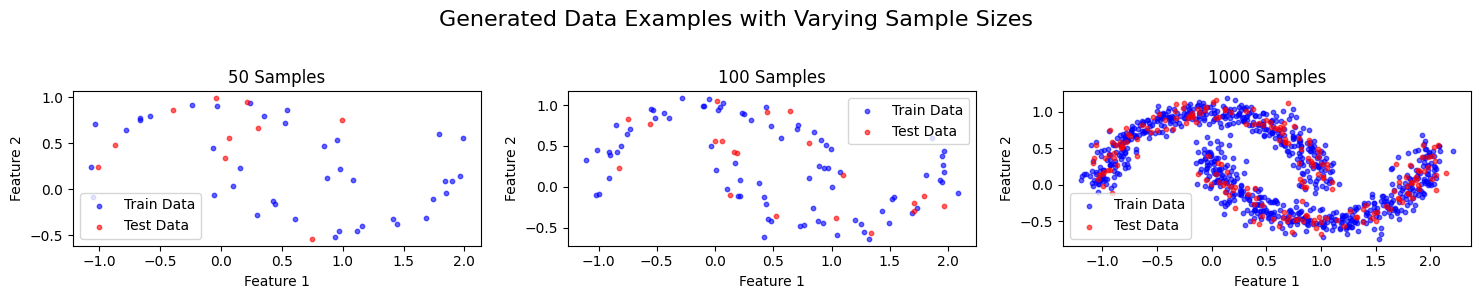

In [32]:
fig, axes = plt.subplots(1, len(generated_datasets), figsize=(15, 3))
fig.suptitle("Generated Data Examples with Varying Sample Sizes", fontsize=16)

for idx, (n_samples, (train_data, test_data)) in enumerate(generated_datasets.items()):
    ax = axes[idx]
    ax.scatter(train_data[:, 0], train_data[:, 1], color="blue", s=10, alpha=0.6, label="Train Data")
    ax.scatter(test_data[:, 0], test_data[:, 1], color="red", s=10, alpha=0.6, label="Test Data")
    ax.set_title(f"{n_samples} Samples")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()

plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.show()

## Models:

### Two-Dimensional Histogram

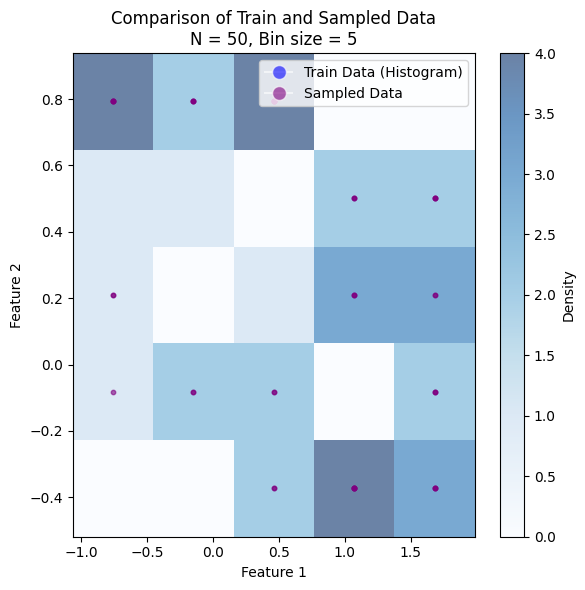

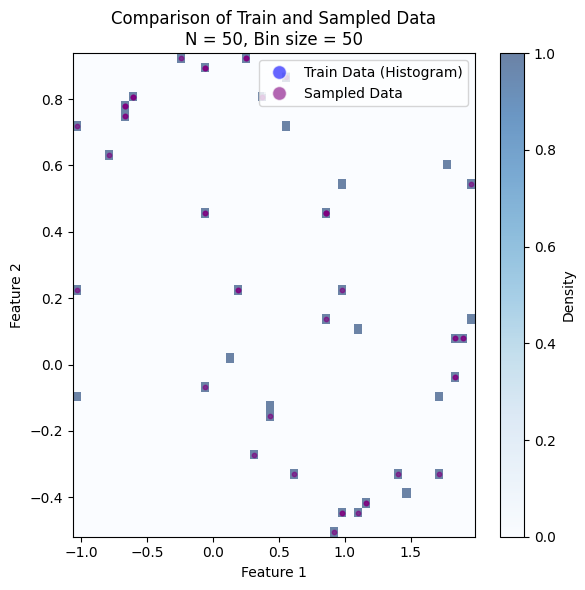

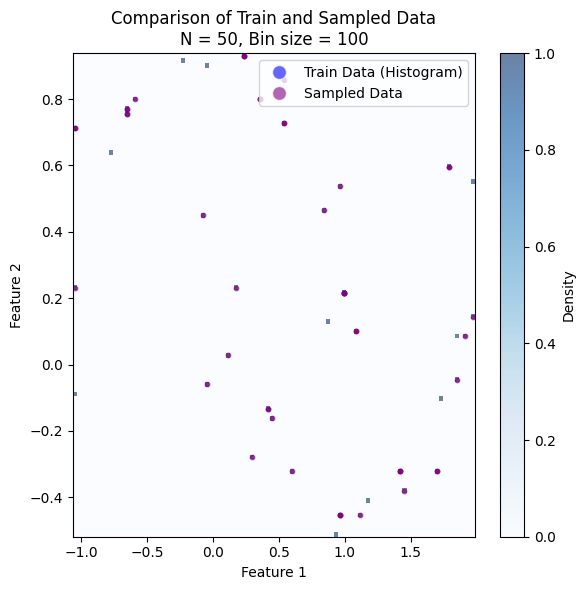

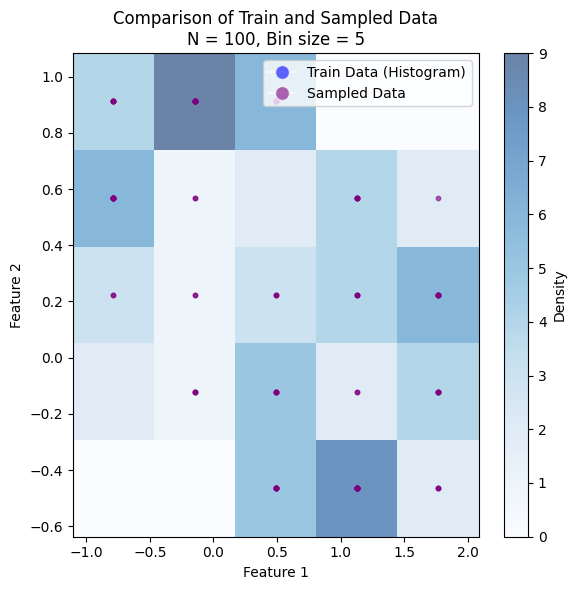

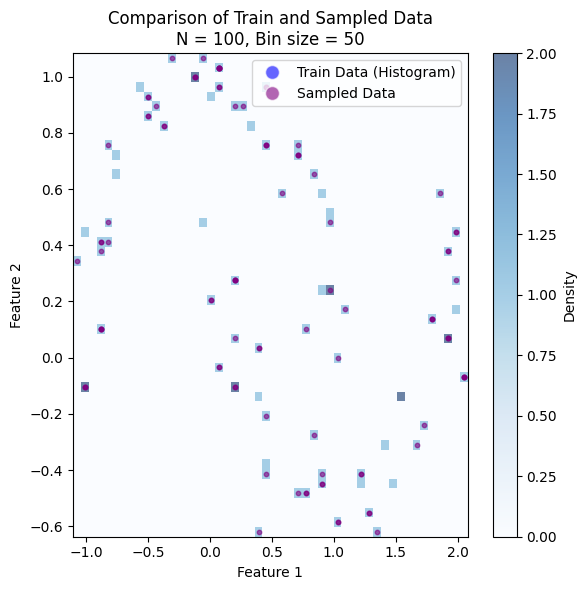

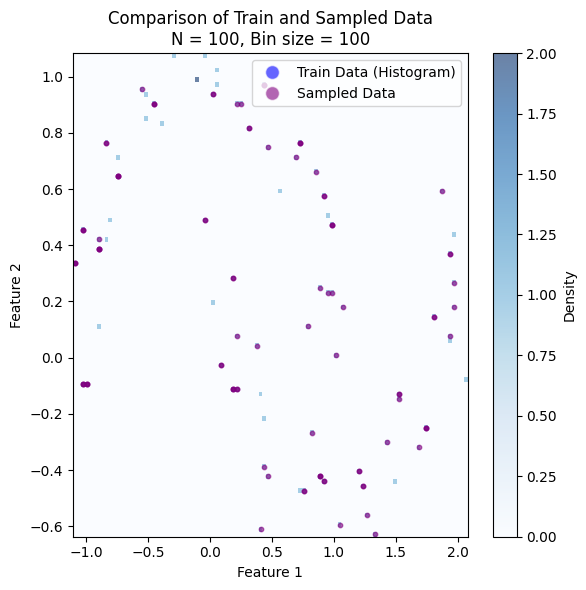

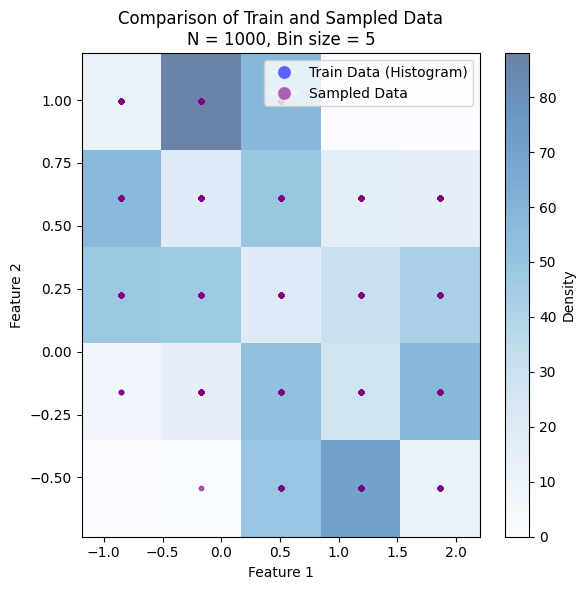

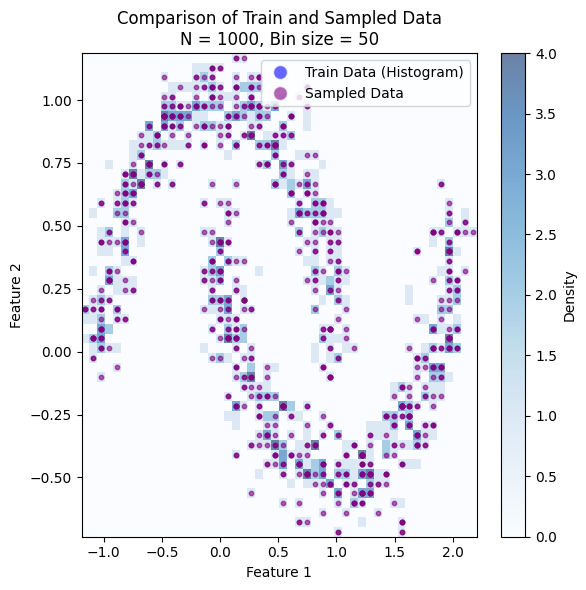

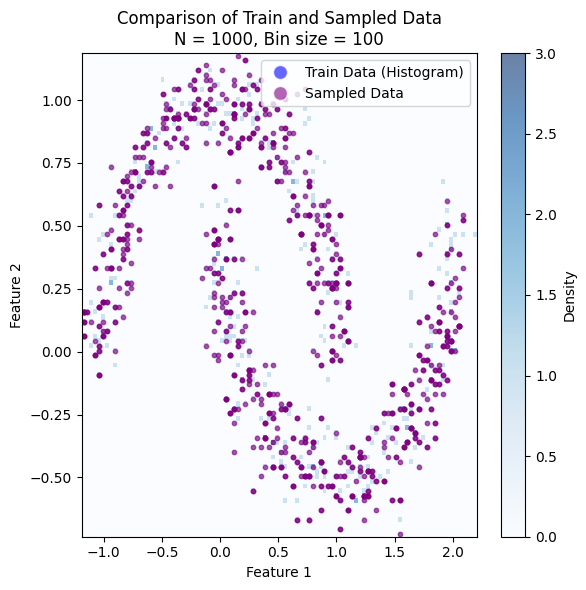

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define bin sizes for the histogram
bin_sizes = [5, 50, 100]

# Loop through each dataset (by sample size) in generated_datasets
for n_samples, (train_data, test_data) in generated_datasets.items():
    
    for bins in bin_sizes:
        # Calculate for X dimension
        smallest_X = np.min(train_data[:, 0])
        largest_X = np.max(train_data[:, 0])
        sorted_X = train_data[np.argsort(train_data[:, 0])]
        Quantiles_X = np.quantile(sorted_X[:, 0], [0.25, 0.5, 0.75])
        IQR_X = Quantiles_X[2] - Quantiles_X[0]
        # Stepsize_X = 2 * IQR_X / pow(80, 1/3)
        # CountBins_X = math.ceil((largest_X - smallest_X) / Stepsize_X)

        # Calculate for Y dimension
        smallest_Y = np.min(train_data[:, 1])
        largest_Y = np.max(train_data[:, 1])
        sorted_y = train_data[np.argsort(train_data[:, 1])]
        Quantiles_Y = np.quantile(sorted_y[:, 1], [0.25, 0.5, 0.75])
        IQR_Y = Quantiles_Y[2] - Quantiles_Y[0]
        # Stepsize_Y = 2 * IQR_Y / pow(80, 1/3)
        # CountBins_Y = math.ceil((largest_Y - smallest_Y) / Stepsize_Y)

        # Create the 2D histogram
        hist, x_bins, y_bins = np.histogram2d(train_data[:, 0], train_data[:, 1], bins=[bins, bins])

        # Get bin centers for sampling
        x_bin_midpoints = (x_bins[:-1] + x_bins[1:]) / 2
        y_bin_midpoints = (y_bins[:-1] + y_bins[1:]) / 2

        # Calculate CDF for sampling
        cdf = np.cumsum(hist.flatten())
        cdf /= cdf[-1]  # Normalize CDF

        # Generate sampled data using the histogram's CDF
        values = np.random.rand(n_samples)
        value_bins = np.searchsorted(cdf, values)
        x_idx, y_idx = np.unravel_index(value_bins, (len(x_bin_midpoints), len(y_bin_midpoints)))
        sampled_data = np.column_stack((x_bin_midpoints[x_idx], y_bin_midpoints[y_idx]))
        new_x, new_y = sampled_data.T

        # Plot train data and sampled data on the same plot
        plt.figure(figsize=(6, 6))
        h = plt.hist2d(train_data[:, 0], train_data[:, 1], bins=(bins, bins), cmap='Blues', alpha=0.6)
        plt.scatter(new_x, new_y, color="purple", s=10, label="Sampled Data", alpha=0.6)
        plt.colorbar(h[3], label="Density")
        plt.title(f'Comparison of Train and Sampled Data\nN = {n_samples}, Bin size = {bins}')
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        
        # Create custom legend entries
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', label='Train Data (Histogram)', markerfacecolor='blue', markersize=10, alpha=0.6),
            Line2D([0], [0], marker='o', color='w', label='Sampled Data', markerfacecolor='purple', markersize=10, alpha=0.6)
        ]
        plt.legend(handles=legend_elements, loc='upper right')
        
        plt.tight_layout()
        plt.show()

## Single Gaussian

#### Define the Gaussian PDF

For a point $ x $, the PDF for a multivariate Gaussian distribution is:
$$
   p(x) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right)
$$
This formula includes:
   - $ |\Sigma| $: Determinant of the covariance matrix.
   - $ \Sigma^{-1} $: Inverse of the covariance matrix.
   - Exponential term based on the squared distance between $ x $ and $ \mu $.

as found on [Wikipedia](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)


The Single Gaussian Model assumes the data follows a Gaussian distribution with these parameters. Since the actual data distribution is not Gaussian, this model will only be an approximation.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mean_and_covariance(data):
    mean = np.mean(data, axis=0)
    covariance = np.cov(data, rowvar=False)
    return mean, covariance

def gaussian_pdf(x, mean, covariance):
    d = len(mean)
    det_covariance = np.linalg.det(covariance)
    inv_covariance = np.linalg.inv(covariance)
    norm_factor = 1 / ((2 * np.pi) ** (d / 2) * det_covariance ** 0.5)
    
    diff = x - mean
    exponent = -0.5 * np.dot(np.dot(diff.T, inv_covariance), diff)
    
    return norm_factor * np.exp(exponent)

def sample_gaussian(mean, covariance, n=1):
    z = np.random.normal(size=(n, len(mean)))
    
    # Transform the samples to match the Gaussian distribution
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    Lambda_sqrt = np.diag(np.sqrt(eigenvalues))
    
    transformed_samples = z @ Lambda_sqrt @ eigenvectors.T + mean
    
    return transformed_samples

Loop through each dataset (by sample size) in generated_datasets and create:

- Plot (i): Density as contour plot
- Plot (ii): Generate and plot synthetic dataset from Gaussian

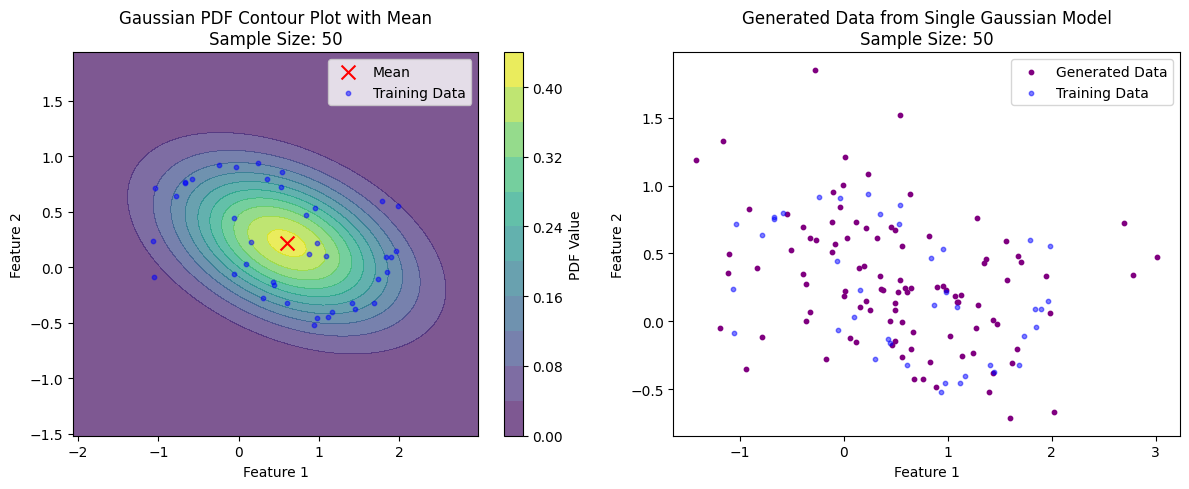

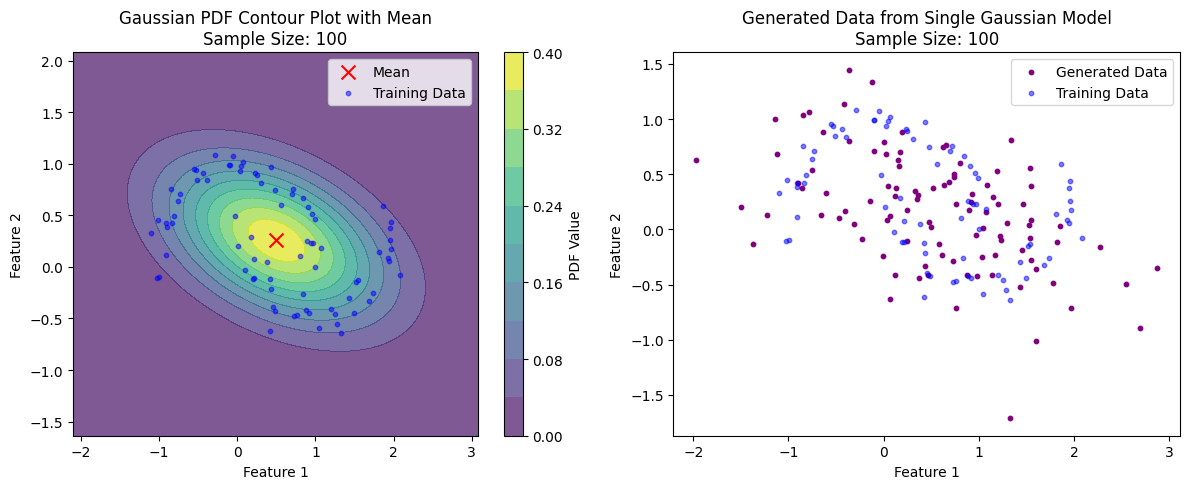

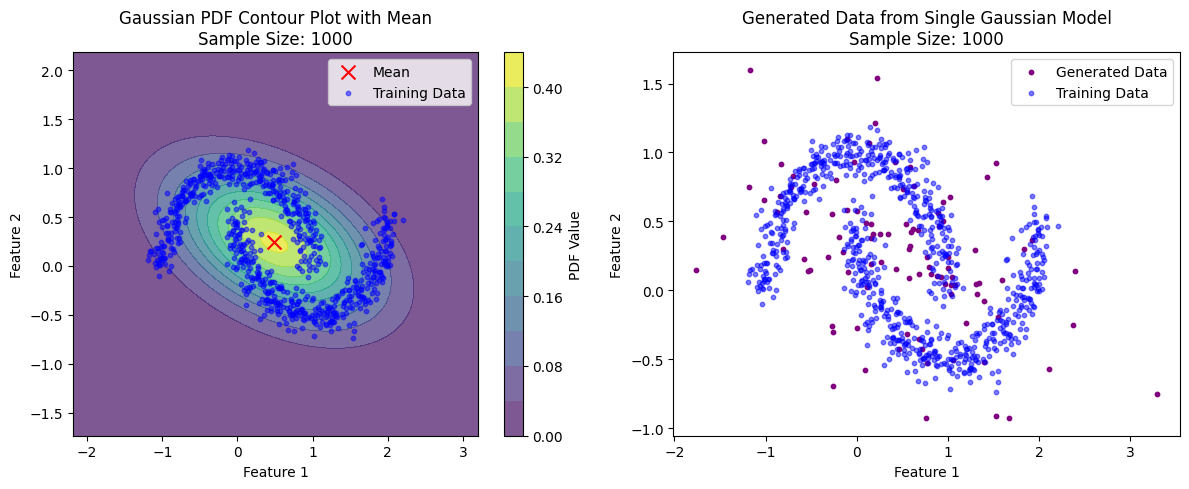

In [35]:
for n_samples, (train_data, test_data) in generated_datasets.items():
    
    # Fit the Gaussian model to the training data
    mean, covariance = calculate_mean_and_covariance(train_data)
    
    # Define grid over the data range for contour plot
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Calculate PDF values over the grid for the contour plot
    pdf_values = np.array([
        gaussian_pdf(np.array([x, y]), mean, covariance)
        for x, y in zip(np.ravel(x_grid), np.ravel(y_grid))
    ])
    pdf_values = pdf_values.reshape(x_grid.shape)
    
    # Plot (i): Density as contour plot
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.contourf(x_grid, y_grid, pdf_values, levels=10, cmap="viridis", alpha=0.7)
    plt.colorbar(label="PDF Value")
    plt.scatter(mean[0], mean[1], color="red", marker="x", s=100, label="Mean")
    plt.scatter(train_data[:, 0], train_data[:, 1], color="blue", s=10, alpha=0.5, label="Training Data")
    plt.title(f"Gaussian PDF Contour Plot with Mean\nSample Size: {n_samples}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    
    # Plot (ii): Generate and plot synthetic dataset from Gaussian
    generated_data = sample_gaussian(mean, covariance, n=100)
    
    plt.subplot(1, 2, 2)
    plt.scatter(generated_data[:, 0], generated_data[:, 1], color="purple", s=10, label="Generated Data")
    plt.scatter(train_data[:, 0], train_data[:, 1], color="blue", s=10, alpha=0.5, label="Training Data")
    plt.title(f"Generated Data from Single Gaussian Model\nSample Size: {n_samples}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

## GMM

### Two-Dimensional Data
A Gaussian mixture model (GMM) $\hat{p}$ approximates the ground-truth pdf $p^*$ by taking a weighted sum of $C$ *components*, $
\mathcal{N}(\mu_c, \Sigma_c)$, $c=1,...,C$. $C$ is a hyperparameter to be determined by outside knowledge or some sort of tuning. Splitting the training set into a training and validation set (or applying K-fold cross-validation) would be most appropriate in general to choose a single model, but we wished to see the test performance for a range of $C$ to understand its effect. Additionally, a GMM requires some sort of initialisation to then begin its training. We implemented two methods:
- Random initialisation: the initial means are a randomly chosen set of training points, and the initial covariance matrices are all the empirical covariance of the training data multiplied by a normalisation factor chosen through trial and error on the training set that seemed to lead to convergence
- K-means++: We first run a K-means++ clustering method on $C$ components, and then take the cluster centers as the initial means, and the within-cluster empirical variances as the initial variances.

However, we found that the random initialisation method was very unstable, often diverging (in particular for high numbers of components and low numbers of samples). We decided to only display results for the kmeans++ initialisation.
A number of training iterations must also be selected, an appropriate method would be to set a high number and then set some termination criterion to check for convergence (in particular that the means and variances stop changing significantly); for simplicity we chose 30 (running sklearn.mixture implementation of the GMM, convergence seemed to occur before 30, so we looked up the answer a little bit in this sense. A better implementation could be preferable)

We define some functions to aid in model training and then obtain some GMMs fitted to the training set for some chosen numbers of components (C), each initialisation method (random or K-means++), and training set size. We simulate having a data set of size $n=100, 200, 500$ and then splitting these 80/20 into training and test sets.

Code comments:
More vectorisation or better yet, implementation in pytorch, would yield much quicker calculations, but given that all models are created in ~1 min on my old laptop, we found this implementation sufficiently fast.

For now, we obtain some negative $MMD^2$ results, I couldn't resolve this in time, so we're returning just the $MMD^2$ rather than the MMD.

In [2]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import multivariate_normal
from itertools import product
from collections import namedtuple
from tqdm.auto import tqdm
from sklearn import datasets

# Define helper functions for gmm
def get_train_test_data_gmm(n=500, seed=11121):
    # Generate all data
    data_all = datasets.make_moons(n, noise=0.1, random_state=seed)[0]

    # Split into train/test data
    train_n = np.floor(0.8 * n).astype(int)
    train_data = data_all[:train_n]
    test_data = data_all[train_n:]

    return train_data, test_data

def squared_exponential_kernel_gmm(x1, x2, h=1.0): # From the lecturer, causing issues
    """Squared Exponential Kernel (RBF Kernel)"""
    return np.exp(-np.sum((x1 - x2) ** 2) / h)


def inverse_multiquadratic_kernel_gmm(x1, x2, h=1.0):
    """Inverse Multiquadratic Kernel"""
    return 1 / (np.sum((x1 - x2) ** 2) / h + 1)

def calculate_mmd_gmm(X_true, X_pred, bandwidths=[1.0]):
    """
    Calculate the Maximum Mean Discrepancy (MMD) between two distributions
    using both squared exponential and inverse multiquadratic kernels.

    Args:
        X_true (np.ndarray): Samples from distribution P, shape (N, D)
        X_pred (np.ndarray): Samples from distribution Q, shape (M, D)
        bandwidths (list): List of bandwidths

    Returns:
        dict: MMD values for each kernel type
    """

    # Define available kernels
    kernels = {
        "squared_exponential": squared_exponential_kernel_gmm,
        "inverse_multiquadratic": inverse_multiquadratic_kernel_gmm
    }

    # Dictionary to store MMD results for each kernel
    mmd_squared_results = {}

    # Loop over each kernel
    for kernel_name, kernel_fn in kernels.items():
        # Initialize components
        N = X_true.shape[0]
        M = X_pred.shape[0]
        xx_sum, yy_sum, xy_sum = 0.0, 0.0, 0.0

        # Calculate intra-distribution kernel sums for each bandwidth
        for h in bandwidths:
            for i in range(N):
                for j in range(N):
                    if i == j:
                        continue
                    xx_sum += kernel_fn(X_true[i], X_true[j], h)
            for i in range(M):
                for j in range(M):
                    if i == j: # skip case with equal indices
                        continue
                    yy_sum += kernel_fn(X_pred[i], X_pred[j], h)
            for i in range(N):
                for j in range(M):
                    xy_sum += kernel_fn(X_true[i], X_pred[j], h)

            # Normalize sums by sample size
            xx_sum /= (N * (N-1))
            yy_sum /= (M * (M-1))
            xy_sum /= (N * M)

        # Calculate MMD for the current kernel
        mmd_squared_value = xx_sum + yy_sum - 2 * xy_sum
        mmd_squared_results[kernel_name] = mmd_squared_value

    # Find max squared value and take square root to return
    #mmd = max(mmd_squared_results.values()) ** 0.5
    mmd_squared = max(mmd_squared_results.values())
    return mmd_squared

def random_initialisation(train_data, C, cov_normalisation=0.2, seed=None):
    if seed:
        np.random.seed(seed)
    # Weights are uniform
    weights_array = np.ones(C) * 1 / C

    # Select C data points to act as initial means
    data_indices = np.random.choice(len(train_data), C, replace=False)
    means_array = train_data[data_indices]

    # Take empirical covariance and multiply by a normalisation factor for random covariances
    data_empirical_covariance = np.cov(train_data, rowvar=False)
    covariances_array = np.repeat(data_empirical_covariance[np.newaxis], C,
                                  axis=0) * cov_normalisation

    return weights_array, means_array, covariances_array

def kmeans_initialisation(train_data, C, seed):
    # Weights are uniform
    weights_array = np.ones(C) * 1 / C

    # Perform k means clustering; initial means are cluster centers, initial variances are cluster empirical variances
    kmeans = KMeans(n_clusters=C, init='k-means++', random_state=seed).fit(train_data)

    ## Obtain means
    means_array = kmeans.cluster_centers_

    ## Obtain covariance arrays by getting empirical covariance within each
    covariances_array = np.zeros((C, 2, 2))
    for k in range(C):
        cluster_data = train_data[kmeans.labels_ == k]
        deviations = cluster_data - means_array[k]
        covariances_array[k] = np.cov(deviations, rowvar=False)

    return weights_array, means_array, covariances_array

def get_influence_array(means_array, covariances_array, weights_array, train_data, C):
    # Store component and full distributions for getting the influence array
    component_dists = [multivariate_normal(means_array[i], covariances_array[i]) for i in range(C)]

    # define pdf_values: element i,k is the probability density of datapoint i in component k
    pdf_values = np.array([[dist.pdf(data_point) for dist in component_dists] for data_point in train_data])

    # Define gamma array: gamma_i,k = 'influences of component k on instance i'
    influence_array = weights_array * pdf_values / np.sum(weights_array * pdf_values, axis=1, keepdims=True)

    return influence_array

def single_value_pdf(x, means_array, covariances_array, weights_array):
    component_dists = [multivariate_normal(means_array[i], covariances_array[i]) for i in range(len(means_array))]

    component_pdf_values = np.array([dist.pdf(x) for dist in component_dists])

    pdf_value = np.sum([weight*density for weight,density in zip(weights_array, component_pdf_values)])
    return(pdf_value)

def update_parameters(train_data, influence_array, C):
    n = len(train_data)
    # Update parameters
    weights_array = np.sum(influence_array, axis = 0)/n

    means_array = np.zeros((C, 2))
    for k in range(C):
        means_array[k] = np.sum((influence_array[:, k, np.newaxis]*train_data), axis = 0)/(n*weights_array[k])

    covariances_array = np.zeros((C, 2, 2))
    for k in range(C):
        deviations = train_data - means_array[k]
        covariances_array[k] = \
            np.array([influence_array[i,k]*np.outer(deviations[i], deviations[i]) for i in range(n)]).sum(axis=0) \
            /influence_array.sum(axis = 0)[k]

    return weights_array, means_array, covariances_array

def make_gmm_pdf(weights_array, means_array, covariances_array):
    def gmm_pdf(x):
        component_dists = [multivariate_normal(means_array[i], covariances_array[i]) for i in range(len(means_array))]
        pdf_value = np.sum([weight*dist.pdf(x) for weight, dist in zip(weights_array, component_dists)])
        return pdf_value

    return gmm_pdf

def train_gmm(train_data, C, num_iter, init_method, init_covariance_normalisation = None, seed = None):
    # Get initial guesses
    assert init_method in ['random', 'kmeans++'], 'Invalid initialisation method'

    if init_method == 'random':
        weights_array, means_array, covariances_array = random_initialisation(train_data,
                                                                              C,
                                                                              init_covariance_normalisation,
                                                                              seed)
    elif init_method == 'kmeans++':
        weights_array, means_array, covariances_array = kmeans_initialisation(train_data,
                                                                              C,
                                                                              seed)

    # Iterate EM algorithm
    for t in range(num_iter):
        influence_array = get_influence_array(means_array, covariances_array, weights_array, train_data, C)

        weights_array, means_array, covariances_array = update_parameters(train_data, influence_array, C)

    return weights_array, means_array, covariances_array

def sample_from_gmm(weights_array, means_array, covariances_array, n, seed):
    if seed:
        np.random.seed(seed)

    # Choose for each sample which component to sample from
    components = np.random.choice(len(weights_array), size=n, p=weights_array)

    # Sample from the corresponding components
    samples = np.array([
        multivariate_normal(means_array[k], covariances_array[k]).rvs()
        for k in components
    ])

    return samples




/home/timat/anaconda3/envs/GNN/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# Fix data parameters
ns = [int(1.25*100), int(1.25*200), int(1.25*500)] 
init_method = 'kmeans++'
Cs = [2,5,10]
seed = 11121
num_iter = 30
normalise = True

# Initialise results storage variable

GMMResult = namedtuple('GMMResult', ['n', 'C', 'w', 'm', 's', 'MMD'])
GMMResults = []

for n, C in tqdm(product(ns, Cs)):
    # Get data
    train_data, test_data = get_train_test_data_gmm(n, seed)

    # Optionally Normalise
    if normalise:
        mean = np.mean(train_data, axis = 0)
        std = np.std(train_data, axis = 0)

        train_data, test_data = (train_data - mean)/std, (test_data - mean)/std

    weights_array, means_array, covariances_array = \
        train_gmm(train_data, C, num_iter, init_method, seed=seed)

    learned_samples = sample_from_gmm(weights_array, means_array, covariances_array, n, seed)

    # Caclulate MMD
    gmm_mmd = calculate_mmd_gmm(test_data, learned_samples)

    GMMResults.append(GMMResult(n=n, C=C, w = weights_array, m = means_array, s = covariances_array, MMD=gmm_mmd))


for res in GMMResults:
    print(f'number of training samples: {int(0.8*res.n)}, number of components: {res.C}, MMD: {res.MMD}')

9it [01:15,  8.44s/it]

number of training samples: 100, number of components: 2, MMD: -0.019709827316906292
number of training samples: 100, number of components: 5, MMD: -0.011785981860885197
number of training samples: 100, number of components: 10, MMD: -0.011973389014051095
number of training samples: 200, number of components: 2, MMD: 0.021480313776009563
number of training samples: 200, number of components: 5, MMD: 0.005351196633576194
number of training samples: 200, number of components: 10, MMD: 0.015426215483562045
number of training samples: 500, number of components: 2, MMD: 0.017240576994951906
number of training samples: 500, number of components: 5, MMD: 0.00043184853539346424
number of training samples: 500, number of components: 10, MMD: -0.003452288269426562


### Plotting the GMMs
First, define some helper functions and variables

In [ ]:
import matplotlib.pyplot as plt

# For density plots
def get_grid(train_data, pdf_func):
    # Define grid over the data range for contour plot
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Calculate PDF values over the grid for the contour plot
    pdf_values = np.array([
        pdf_func(np.array([x, y]))
        for x, y in zip(np.ravel(x_grid), np.ravel(y_grid))
    ])
    pdf_values = pdf_values.reshape(x_grid.shape)

    return x_grid, y_grid, pdf_values

def plot_density(x_grid, y_grid, pdf_values, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.contourf(x_grid, y_grid, pdf_values, levels=10, cmap="viridis", alpha=0.7)
    plt.colorbar(label="PDF Value")
    plt.scatter(mean[0], mean[1], color="red", marker="x", s=100, label="Mean")
    plt.scatter(train_data[:, 0], train_data[:, 1], color="blue", s=10, alpha=0.5, label="Training Data")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

best_ind = np.argmin([res.MMD for res in GMMResults])
best_res = GMMResults[best_ind]
best_pdf = make_gmm_pdf(best_res.w, best_res.m, best_res.s)

worst_ind = np.argmax([res.MMD for res in GMMResults])
worst_res = GMMResults[worst_ind]
worst_pdf = make_gmm_pdf(worst_res.w, worst_res.m, worst_res.s)

## For plotting synthetic data
def plot_generated_data(generated_data):
    plt.subplot(1, 2, 2)
    plt.scatter(generated_data[:, 0], generated_data[:, 1], color="purple", s=10, label="Generated Data")
    plt.scatter(train_data[:, 0], train_data[:, 1], color="blue", s=10, alpha=0.5, label="Training Data")
    plt.title("Generated Data from Single Gaussian Model")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

    plt.tight_layout()
    plt.show()


#### Plot (i): Density as a contour plot


We plot the pdfs of the highest MMD model as well as lowest MMD model as contour plots. Interestingly, they're both mixture models with two components, and the version with more samples performed worse (counter-intuitvely), perhaps due to some bad initialisation that led to a poor local optimum. One might have expected that allowing for more components would yield better results, which didn't occur here; I expect that over fitting may occur. We chose to allow each component to have it's own independent covariance matrix; perhaps restricting the number of parameters by setting constraints on the covariance matrices could yield better results for more components, but given the options I wouldn't expect so (eg for a spherical requirement: I don't see the pdf being well approximated by spherical Gaussians) Both plots do seem to have intuitive locations to place some mixture models; a $C=4$ model could also be trained to see if it would approximate the two arms of each moon.

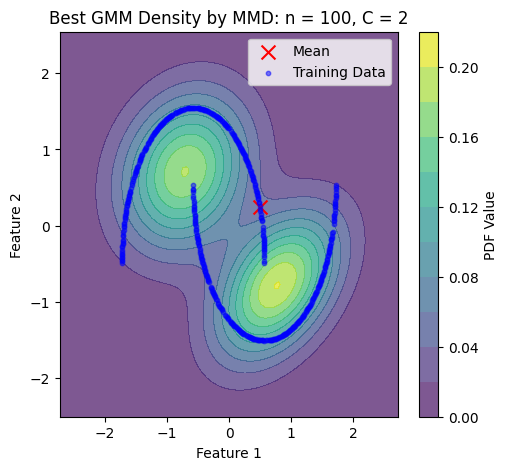

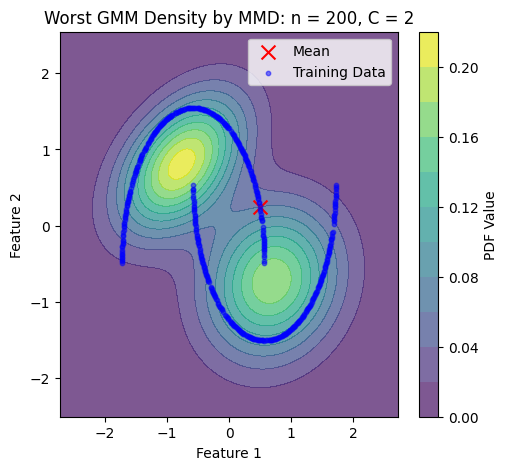

In [ ]:
best_grids = get_grid(train_data, pdf_func = best_pdf)
worst_grids = get_grid(train_data, pdf_func = worst_pdf)

plot_density(*best_grids, title = f'Best GMM Density by MMD: n = {int(0.8*best_res.n)}, C = {best_res.C}')
plot_density(*worst_grids, title = f'Worst GMM Density by MMD: n = {int(0.8*worst_res.n)}, C = {worst_res.C}')

#### Plot (ii): Synthetic data

We can see that the synthetic data is very unconvincing, aligning with the pdf plot above.

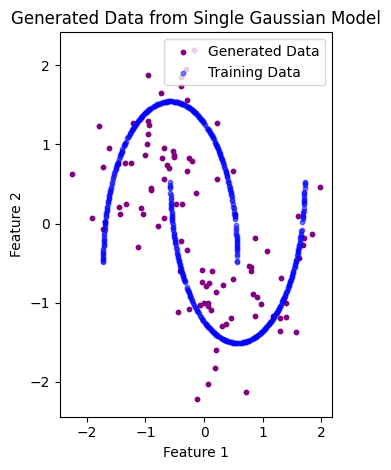

In [ ]:
generated_data = sample_from_gmm(best_res.w, best_res.m, best_res.s, n = 100, seed = seed)
plot_generated_data(generated_data)

## KDE

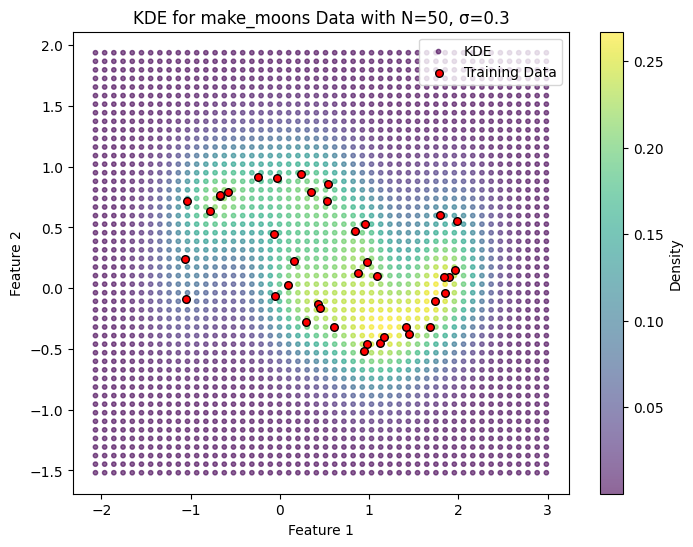

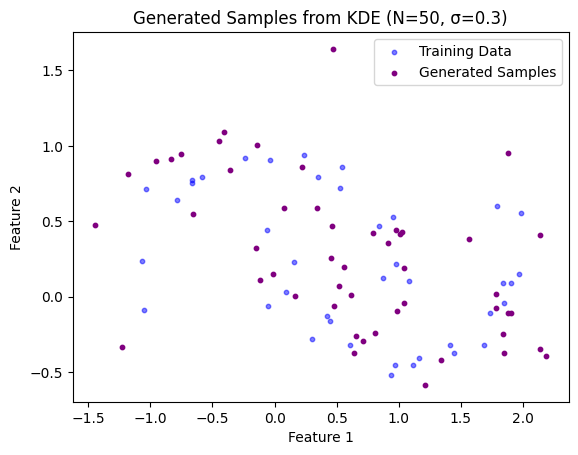

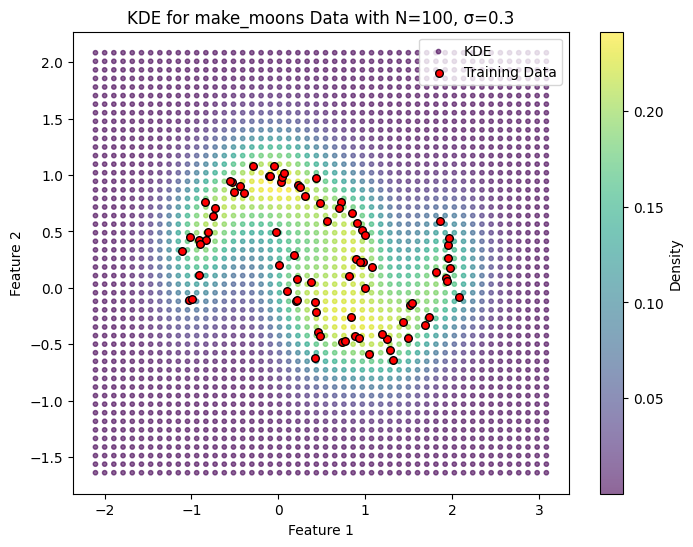

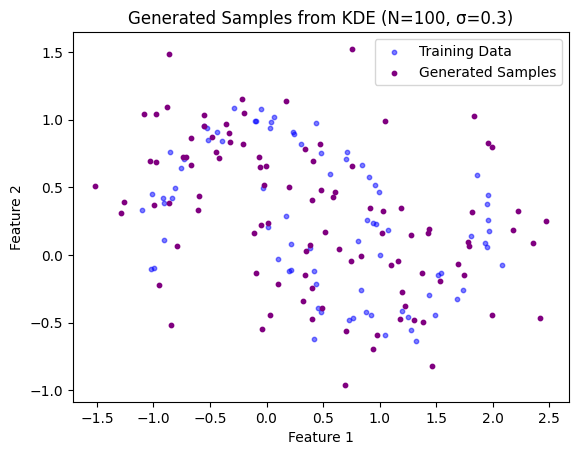

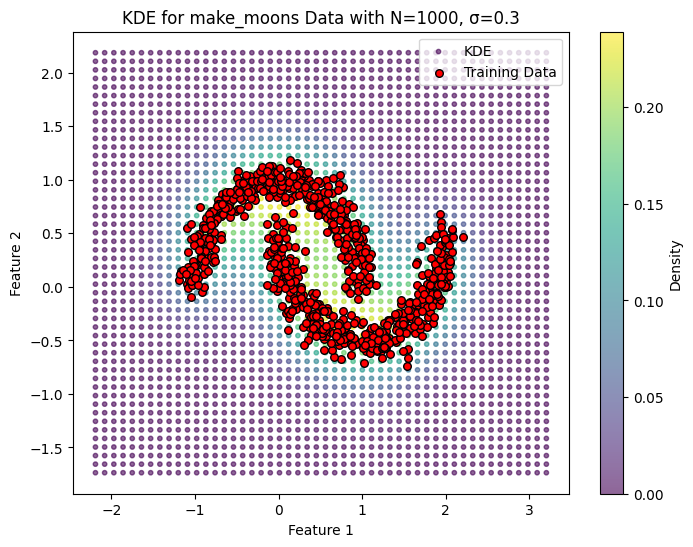

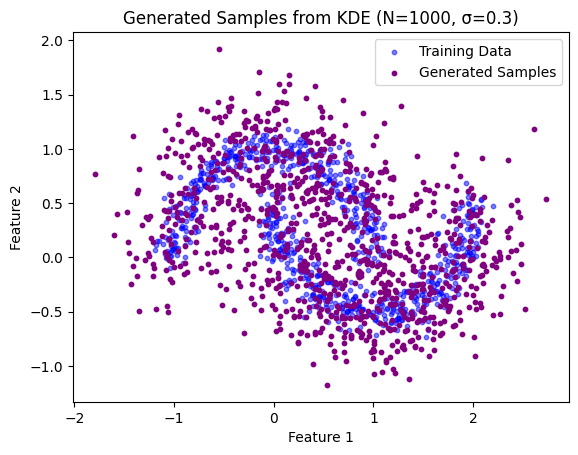

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import math


# KDE functions
def gaussian_kernel(x, data_points, sigma):
    """Calculate the Gaussian kernel values for each data point."""
    diff = x - data_points
    d = data_points.shape[1]
    return (1 / ((2 * np.pi) ** (d / 2) * sigma ** d)) * np.exp(-np.sum(diff ** 2, axis=1) / (2 * sigma ** 2))

def kde(data, x_points, sigma):
    """Calculate KDE values over the grid points."""
    kde_values = np.zeros(x_points.shape[0])
    for i, x in enumerate(x_points):
        kde_values[i] = np.mean(gaussian_kernel(x, data, sigma))  # Vectorized kernel calculation
    return kde_values

def sample_kde(data, sigma, n_samples=1):
    """Generate new samples from the KDE by adding Gaussian noise around data points."""
    points = data[np.random.choice(len(data), n_samples)]
    samples = points + np.random.normal(scale=sigma, size=points.shape)
    return samples

def plot_kde(data, kde_values, x_points, title="KDE for make_moons Data"):
    """Plot the KDE heatmap with training data overlaid."""
    plt.figure(figsize=(8, 6))
    plt.scatter(x_points[:, 0], x_points[:, 1], c=kde_values, cmap="viridis", s=10, alpha=0.6, label="KDE")
    plt.colorbar(label="Density")
    plt.scatter(data[:, 0], data[:, 1], color='red', s=30, edgecolor="black", label="Training Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.show()

# Usage
if __name__ == "__main__":
    generated_datasets = get_train_test_data()

    for n_samples, (train_data, test_data) in generated_datasets.items():
        # Define evaluation points for the KDE
        x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
        y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
        x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
        x_points = np.c_[x_grid.ravel(), y_grid.ravel()]  # Flatten the grid points for evaluation

        sigma = 0.3  # Bandwidth parameter, adjust as needed
        kde_values = kde(train_data, x_points, sigma)
        kde_values = kde_values.reshape(x_grid.shape)  # Reshape to match the grid for plotting

        # Plot KDE heatmap with training data
        plot_kde(train_data, kde_values, x_points, title=f"KDE for make_moons Data with N={n_samples}, σ={sigma}")

        # Generate and plot samples from KDE
        generated_samples = sample_kde(train_data, sigma, n_samples=n_samples)
        plt.figure()
        plt.scatter(train_data[:, 0], train_data[:, 1], color='blue', s=10, alpha=0.5, label="Training Data")
        plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='purple', s=10, label="Generated Samples")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.title(f"Generated Samples from KDE (N={n_samples}, σ={sigma})")
        plt.show()


## MMD Evaluation Part

Defintion for MMD

In [38]:
import numpy as np


def squared_exponential_kernel(x1, x2, h=1.0): # From the lecturer, causing issues
    """Squared Exponential Kernel (RBF Kernel)"""
    return np.exp(-np.sum((x1 - x2) ** 2) / h)


def inverse_multiquadratic_kernel(x1, x2, h=1.0):
    """Inverse Multiquadratic Kernel"""
    return 1 / (np.sum((x1 - x2) ** 2) / h + 1)

# def squared_exponential_kernel(x1, x2, h=1.0): # From online sources
#     """Squared Exponential Kernel (RBF Kernel)"""
#     return np.exp(-np.sum((x1 - x2) ** 2) / (2 * h ** 2))


# def inverse_multiquadratic_kernel(x1, x2, h=1.0):
#     """Inverse Multiquadratic Kernel"""
#     return 1 / np.sqrt(np.sum((x1 - x2) ** 2) + h)


def calculate_mmd(X_true, X_pred, bandwidths=[1.0]):
    """
    Calculate the Maximum Mean Discrepancy (MMD) between two distributions
    using both squared exponential and inverse multiquadratic kernels.

    Args:
        X_true (np.ndarray): Samples from distribution P, shape (N, D)
        X_pred (np.ndarray): Samples from distribution Q, shape (M, D)
        bandwidths (list): List of bandwidths

    Returns:
        dict: MMD values for each kernel type
    """

    # Define available kernels
    kernels = {
        "squared_exponential": squared_exponential_kernel,
        "inverse_multiquadratic": inverse_multiquadratic_kernel
    }

    # Dictionary to store MMD results for each kernel
    mmd_squared_results = {}

    # Loop over each kernel
    for kernel_name, kernel_fn in kernels.items():
        # Initialize components
        N = X_true.shape[0]
        M = X_pred.shape[0]
        xx_sum, yy_sum, xy_sum = 0.0, 0.0, 0.0

        # Calculate intra-distribution kernel sums for each bandwidth
        for h in bandwidths:
            for i in range(N):
                for j in range(N):
                    if i == j:
                        continue
                    xx_sum += kernel_fn(X_true[i], X_true[j], h)
            for i in range(M):
                for j in range(M):
                    if i == j: # skip case with equal indices
                        continue
                    yy_sum += kernel_fn(X_pred[i], X_pred[j], h)
            for i in range(N):
                for j in range(M):
                    xy_sum += kernel_fn(X_true[i], X_pred[j], h)

            # Normalize sums by sample size
            xx_sum /= (N * (N-1))
            yy_sum /= (M * (M-1))
            xy_sum /= (N * M)

        # Calculate MMD for the current kernel
        mmd_squared_value = xx_sum + yy_sum - 2 * xy_sum
        mmd_squared_results[kernel_name] = mmd_squared_value

    # Find max squared value and take square root to return
    #mmd = max(mmd_squared_results.values()) ** 0.5
    mmd_squared = max(mmd_squared_results.values())
    return mmd_squared

The mmd values for the gmm models can be found in the appropriate section

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
import math

# Function to generate and evaluate KDE samples using MMD
def evaluate_kde_mmd(generated_datasets, bandwidths=[1.0, 2.0]):
    mmd_results_kde = {}
    
    for n_samples, (train_data, test_data) in generated_datasets.items():
        sigma = 0.3 

        # Generate samples from the KDE
        generated_samples = sample_kde(train_data, sigma, n_samples=n_samples)

        # Calculate MMD between the KDE-generated samples and the test data
        mmd_value = calculate_mmd(test_data, generated_samples, bandwidths=bandwidths)

        mmd_results_kde[n_samples] = mmd_value
        print(f"MMD for KDE-generated samples (N={n_samples}, σ={sigma}): {mmd_value}")
    
    return mmd_results_kde

# Function to generate and evaluate Single Gaussian samples using MMD
def evaluate_gaussian_mmd(generated_datasets, bandwidths=[1.0, 2.0]):
    mmd_results_gaussian = {}
    
    for n_samples, (train_data, test_data) in generated_datasets.items():
        # Fit a Gaussian model to the training data
        mean, covariance = calculate_mean_and_covariance(train_data)
        
        # Generate samples from the fitted Gaussian model
        generated_samples = sample_gaussian(mean, covariance, n=n_samples)
        
        # Calculate MMD between the Gaussian-generated samples and the test data
        mmd_value = calculate_mmd(test_data, generated_samples, bandwidths=bandwidths)
        
        mmd_results_gaussian[n_samples] = mmd_value
        print(f"MMD for Gaussian-generated samples (N={n_samples}): {mmd_value}")
    
    return mmd_results_gaussian

# Function to generate and evaluate Histogram samples using MMD
def evaluate_histogram_mmd(generated_datasets, bin_sizes=[5, 10, 15, 20, 50, 100], bandwidths=[1.0, 2.0]):
    mmd_results_histogram = {}

    for n_samples, (train_data, test_data) in generated_datasets.items():
        mmd_results_histogram[n_samples] = {}

        for bins in bin_sizes:
            # Calculate histogram and generate samples
            hist, x_bins, y_bins = np.histogram2d(train_data[:, 0], train_data[:, 1], bins=[bins, bins])
            x_bin_midpoints = (x_bins[:-1] + x_bins[1:]) / 2
            y_bin_midpoints = (y_bins[:-1] + y_bins[1:]) / 2

            # Generate samples from the histogram's CDF
            cdf = np.cumsum(hist.flatten())
            cdf /= cdf[-1]
            values = np.random.rand(n_samples)
            value_bins = np.searchsorted(cdf, values)
            x_idx, y_idx = np.unravel_index(value_bins, (len(x_bin_midpoints), len(y_bin_midpoints)))
            sampled_data = np.column_stack((x_bin_midpoints[x_idx], y_bin_midpoints[y_idx]))

            # Calculate MMD between the histogram-generated samples and the test data
            mmd_value = calculate_mmd(test_data, sampled_data, bandwidths=bandwidths)
            mmd_results_histogram[n_samples][bins] = mmd_value
            print(f"MMD for Histogram-generated samples (N={n_samples}, Bins={bins}): {mmd_value}")

    return mmd_results_histogram
# Usage with the previously defined data
generated_datasets = get_train_test_data()

# Evaluate MMD for KDE, GMM, Histogram, and Single Gaussian
mmd_results_histogram = evaluate_histogram_mmd(generated_datasets)
mmd_results_kde = evaluate_kde_mmd(generated_datasets)
mmd_results_gmm = evaluate_gmm_mmd(generated_datasets)
mmd_results_gaussian = evaluate_gaussian_mmd(generated_datasets)

# Print final MMD results
print("\nFinal MMD Results:")
print("KDE:", mmd_results_kde)
print("GMM:", mmd_results_gmm)
print("Gaussian:", mmd_results_gaussian)
print("Histogram:", mmd_results_histogram)

MMD for Histogram-generated samples (N=50, Bins=5): 0.11476054489249532
MMD for Histogram-generated samples (N=50, Bins=10): 0.173367349423435
MMD for Histogram-generated samples (N=50, Bins=15): 0.08955748549565223
MMD for Histogram-generated samples (N=50, Bins=20): 0.22165831907987155
MMD for Histogram-generated samples (N=50, Bins=50): 0.10046296749768358
MMD for Histogram-generated samples (N=50, Bins=100): 0.12217943414332466
MMD for Histogram-generated samples (N=100, Bins=5): -0.006468953962164958
MMD for Histogram-generated samples (N=100, Bins=10): -0.013838556604290675
MMD for Histogram-generated samples (N=100, Bins=15): -0.016830545113565742
MMD for Histogram-generated samples (N=100, Bins=20): 0.0016845294381506726
MMD for Histogram-generated samples (N=100, Bins=50): -0.013708872809653938
MMD for Histogram-generated samples (N=100, Bins=100): -0.01636436072804015
MMD for Histogram-generated samples (N=1000, Bins=5): -0.001214657418976861
MMD for Histogram-generated sampl

## Hyperparameter Evaluation

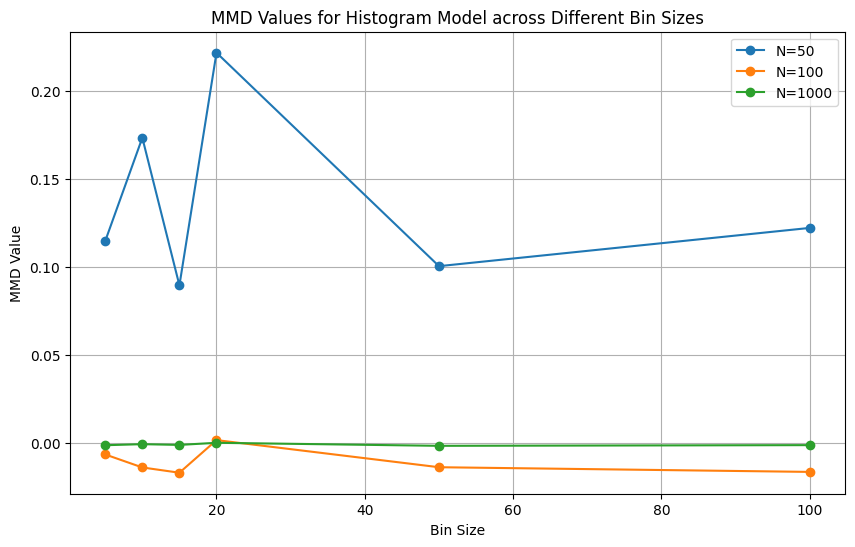

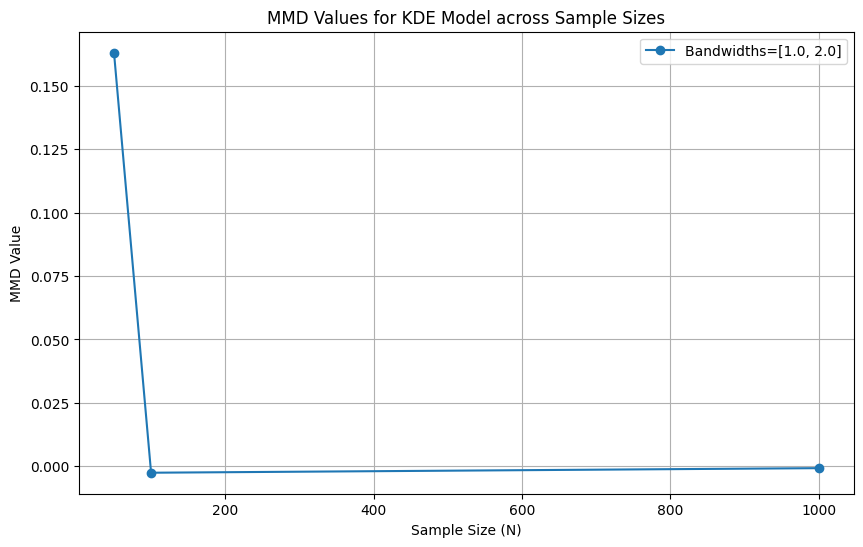

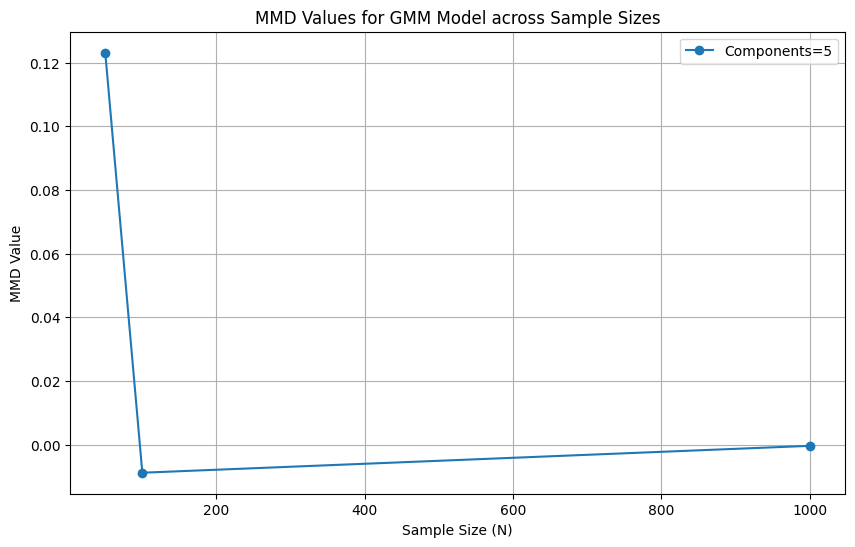

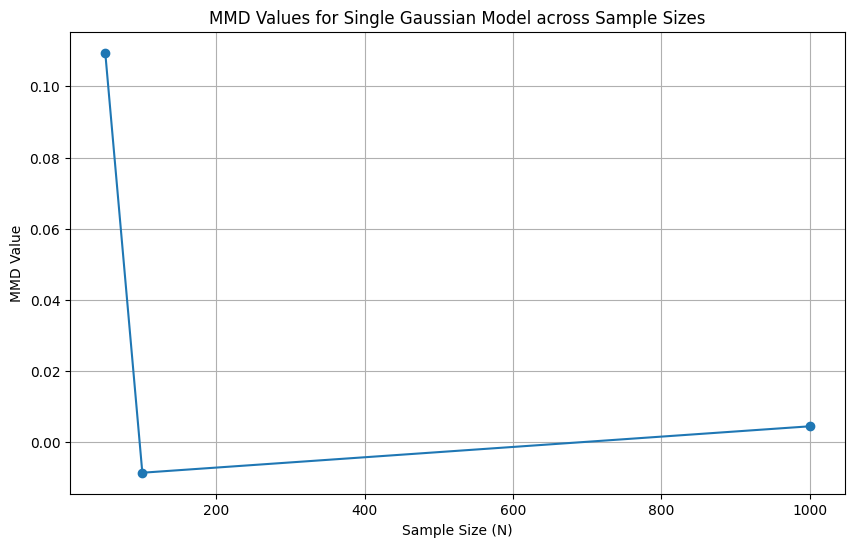

In [40]:
import matplotlib.pyplot as plt

# Function to plot MMD results for Histogram model
def plot_histogram_mmd(mmd_results_histogram, bin_sizes):
    plt.figure(figsize=(10, 6))
    for n_samples, mmd_values in mmd_results_histogram.items():
        bins = list(mmd_values.keys())
        mmd_scores = list(mmd_values.values())
        plt.plot(bins, mmd_scores, marker='o', label=f'N={n_samples}')
    plt.xlabel("Bin Size")
    plt.ylabel("MMD Value")
    plt.title("MMD Values for Histogram Model across Different Bin Sizes")
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot MMD results for KDE model
def plot_kde_mmd(mmd_results_kde, bandwidths):
    plt.figure(figsize=(10, 6))
    sample_sizes = list(mmd_results_kde.keys())
    mmd_scores = list(mmd_results_kde.values())
    plt.plot(sample_sizes, mmd_scores, marker='o', label=f'Bandwidths={bandwidths}')
    plt.xlabel("Sample Size (N)")
    plt.ylabel("MMD Value")
    plt.title("MMD Values for KDE Model across Sample Sizes")
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot MMD results for GMM model
def plot_gmm_mmd(mmd_results_gmm, components):
    plt.figure(figsize=(10, 6))
    sample_sizes = list(mmd_results_gmm.keys())
    mmd_scores = list(mmd_results_gmm.values())
    plt.plot(sample_sizes, mmd_scores, marker='o', label=f'Components={components}')
    plt.xlabel("Sample Size (N)")
    plt.ylabel("MMD Value")
    plt.title("MMD Values for GMM Model across Sample Sizes")
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot MMD results for Single Gaussian model
def plot_gaussian_mmd(mmd_results_gaussian):
    plt.figure(figsize=(10, 6))
    sample_sizes = list(mmd_results_gaussian.keys())
    mmd_scores = list(mmd_results_gaussian.values())
    plt.plot(sample_sizes, mmd_scores, marker='o')
    plt.xlabel("Sample Size (N)")
    plt.ylabel("MMD Value")
    plt.title("MMD Values for Single Gaussian Model across Sample Sizes")
    plt.grid()
    plt.show()

# Plot MMD results for each model
plot_histogram_mmd(mmd_results_histogram, bin_sizes=[5, 10, 15, 20, 50, 100])
plot_kde_mmd(mmd_results_kde, bandwidths=[1.0, 2.0])
plot_gmm_mmd(mmd_results_gmm, components=5)
plot_gaussian_mmd(mmd_results_gaussian)

**Summary and Discussion**

### Histogram

**Observations:**
- Different MMD kernels (e.g., squared exponential, inverse multiquadratic) identify similar models as good or bad, with similar MMD scores across kernels.
- Small bin sizes (e.g., < 20) do not approximate the original distribution well, as they lack sufficient detail.
- The smallest MMD value is observed around a bin size of 20, indicating that this bin size may best approximate the original data distribution.
- Increasing the bin size beyond 20 does not yield significant improvement in MMD, suggesting diminishing returns for larger bins.
- Sampling from histograms is sensitive to bin sizes; an appropriate bin size is essential to capture distributional details without overfitting.
- Most histograms (except those with very small bin sizes, like 5) capture the general shape of the two moons.
- Different bin sizes perform best for different dataset sizes.

**Strengths:**
- Simple, intuitive model that is easy to interpret.
- Works well for low-dimensional data (1D or 2D).
- Adjustable bin size allows flexibility: finer bins capture more detail, while coarser bins provide smoother approximations for larger datasets.

**Weaknesses:**
- Model accuracy depends heavily on bin size selection, which requires tuning.
- Less effective for higher-dimensional data due to bin count explosion.

### Single Gaussian

**Strengths:**
- **Simplicity and Efficiency**: Computationally efficient and easy to implement, requiring minimal code.
- **Approximation for Unimodal Distributions**: Suitable for approximately unimodal and symmetric data, providing a reasonable fit in such cases.

**Weaknesses:**
- **Limited Flexibility for Complex Shapes**: Unable to capture multimodal or non-linear distributions, such as the "moons" data, due to its single peak structure.
- **Poor Fit for Non-Gaussian Data**: Assumes symmetric distribution, making it unsuitable for clustered or irregular shapes, leading to inaccuracies.

*Conclusion*: While this model is unsuitable for the "moons" dataset, it serves as a baseline for comparison, highlighting areas where more complex models (e.g., GMM, KDE) provide better fits.


### Gaussian Mixture Model (GMM)

**Strengths:**
- **Flexibility**: Offers significantly more flexibility than a single Gaussian by modeling multiple clusters, making it suitable for multimodal distributions.
- **Ease of Interpretation**: Remains easy to understand, fit, and sample from, especially for moderately complex distributions.

**Weaknesses:**
- **Sensitivity to Initialization**: The EM algorithm is sensitive to initial parameters, meaning that initialization quality can impact results as much as dataset size or quality.
- **Component Selection**: The number of components must be chosen carefully, requiring expert knowledge, pilot experiments, or tuning—all of which have challenges.
- **Struggles with Complexity**: With a small number of components, the model may struggle to fit complex distributions.


### Kernel Density Estimation (KDE)

**Observations:**
- Different bandwidths significantly impact MMD values, with lower bandwidths performing better for the chosen dataset sizes.
- Optimal bandwidth varies by dataset size, as different bandwidths yield the best fit for different amounts of data.
- For models with optimal bandwidth, the KDE captures the two moons well, while larger bandwidths produce overly smooth approximations, losing the shape.

**Strengths:**
- **Extensibility**: Can be extended to higher dimensions, although performance may degrade with dimensionality.
- **Visual Interpretability**: Easy to visualize and interpret; adjusting bandwidth enables control over model smoothness.

**Weaknesses:**
- **Bandwidth Sensitivity**: Model performance is highly sensitive to bandwidth, requiring careful tuning (often through trial and error).
- **Computationally Intensive for Higher Dimensions**: KDE can become computationally expensive as dimensionality increases.

# Exercise 2: Higher-dimensional data

# GMM

We can see that the MMD is very small for all models and that interestingly the best result is once again attained with a small number of components. I would not have expected 2 components to have such a low mmd for what I would expect to be a very complex distribution. The same comment about overfitting applies. We will now visualise some synthetic data from the worst and best performing model, but given the low MMD, we can expect these to be pretty good. Indeed, all digits are quite recognisable.

In [3]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

def get_digits_train_test_data(seed = None):
    if seed:
        np.random.seed(seed)
    digits_data = datasets.load_digits()
    features, targets = digits_data['data'], digits_data['target']
    
    # Split into train/test. Take random 80/20 split
    n = len(targets)
    shuffled_indices = np.random.permutation(n)
    features, targets = features[shuffled_indices], targets[shuffled_indices]
    
    split_index = np.floor(0.8*n).astype(int)
    
    train_features, test_features = features[:split_index], features[split_index:]
    train_targets, test_targets = targets[:split_index], targets[split_index]
    
    return train_features, train_targets, test_features, test_targets

def plot_digits(digit_imgs):
    fig, axs = plt.subplots(2, 3, figsize=(10, 6))

    titles = ["Best model sampled synthetic 0", "Best model sampled synthetic 1", "Best model sampled synthetic 2",
            "Worst model sampled synthetic 0", "Worst model sampled synthetic 1", "Worst model sampled synthetic 2"]

    # Plot each image in the respective subplot with titles
    for i, ax in enumerate(axs.flat):
        ax.imshow(digit_imgs[i], cmap='gray')  # Display image in grayscale
        ax.set_title(titles[i])            # Set title
        ax.axis('off')                     # Hide axes for cleaner look

    # Adjust layout for readability
    plt.tight_layout()
    plt.show()


# Get data
train_features, train_targets, test_features, test_targets = get_digits_train_test_data(11121)
# Train gmm
## Fix hyperparams

gmms = {}
mmds = {}
synthetic_data_dict = {}
for C in [2,3,5,10,20]:
    seed = 11121

    ## Split per digit
    digit_gmms = []
    for digit in range(10):
        digit_features = train_features[train_targets == digit]

        digit_gmm = GaussianMixture(C, covariance_type='full', random_state=seed)
        digit_gmm.fit(digit_features)

        digit_gmms.append(digit_gmm)

    # Generate synthetic data: 10 cases per digit
    synthetic_features = np.array([digit_gmm.sample(10)[0] for digit_gmm in digit_gmms])
    synthetic_features = synthetic_features.reshape(-1, synthetic_features.shape[-1])
    synthetic_targets = np.repeat(np.arange(10),10)

    # Get MMD
    mmd = calculate_mmd_gmm(test_features, synthetic_features)
    
    mmds[C] = mmd
    gmms[C] = digit_gmms
    synthetic_data_dict[C] = (synthetic_features, synthetic_targets)

for C, mmd in mmds.items():
    print(f'Number of components: {C}, mmd: {mmd}')

Number of components: 2, mmd: 6.373292752000865e-06
Number of components: 3, mmd: 9.984238341473502e-07
Number of components: 5, mmd: 8.132523270268583e-06
Number of components: 10, mmd: 4.444816468106598e-06
Number of components: 20, mmd: 8.950673771105939e-06


We now visualise some sample data

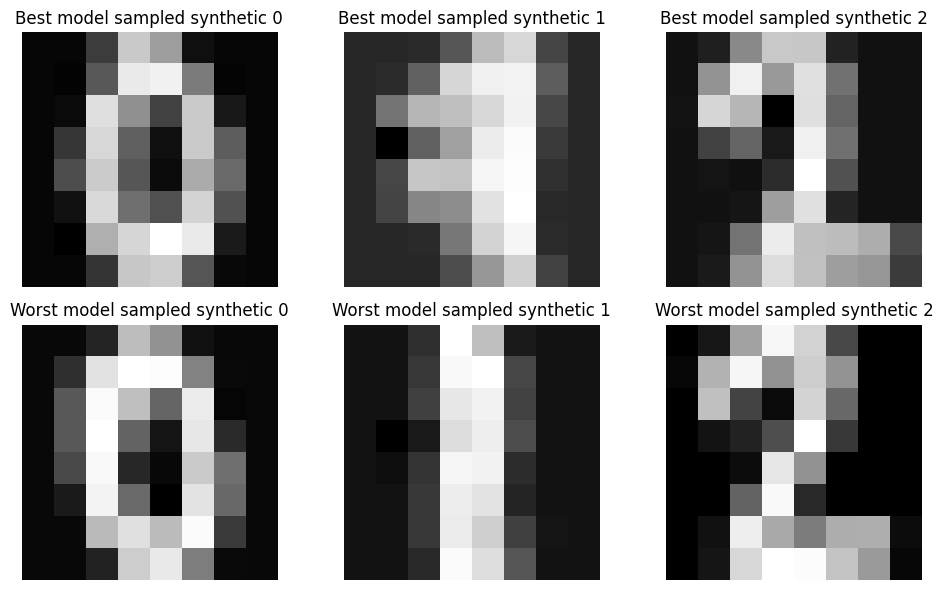

In [4]:
best_C = min(mmds, key=mmds.get)
worst_C = max(mmds, key=mmds.get)
best_gmm = gmms[best_C]
worst_gmm = gmms[worst_C]

good_digits = [best_gmm[i].sample(1)[0].reshape(8,8) for i in range(3)] # Obtain digit sample for i in range 3 and sample 1 point
bad_digits = [worst_gmm[i].sample(1)[0].reshape(8,8) for i in range(3)]
plot_digits(good_digits+bad_digits)

### Random forest
We now train a random forest on the training split of the digits dataset to classify the images into their respective digit classes, and apply it to the synthetic data to see if it can recognise the synthetic data as what it's "supposed to be". Amazingly, only one digit out of 100 is falsely recognised, giving a quantitative verification of the expectation we could have from the qualitative visualisations.

In [5]:
# Get best synthetic data again
synthetic_features, synthetic_targets = synthetic_data_dict[best_C]
# Train random (forest classifier) 
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(random_state=seed)
randomForest.fit(train_features, train_targets)
rf_predictions = randomForest.predict(synthetic_features)

np.sum(synthetic_targets!=rf_predictions)
# Every digit is recognisable! 
print(f"The number of falsely classified digits is: {np.sum(synthetic_targets!=rf_predictions)}")

The number of falsely classified digits is: 1
